In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('Customer_Behaviour.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
df['Male']=pd.get_dummies(df['Gender'],drop_first=True)

In [8]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased,Male
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1
...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,0
396,15706071,Male,51,23000,1,1
397,15654296,Female,50,20000,1,0
398,15755018,Male,36,33000,0,1


In [9]:
df.drop(['User ID','Gender'],axis=1,inplace=True)

In [180]:
df.to_csv('custbeh.csv')

<Axes: xlabel='Purchased', ylabel='count'>

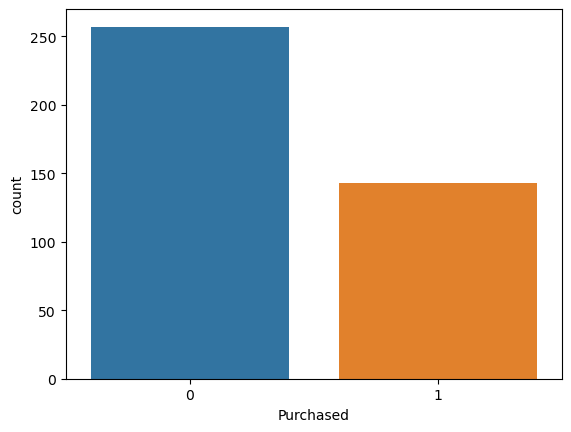

In [11]:
sns.countplot(x=df['Purchased'])

array([[<Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='EstimatedSalary', ylabel='Age'>,
        <Axes: xlabel='Purchased', ylabel='Age'>,
        <Axes: xlabel='Male', ylabel='Age'>],
       [<Axes: xlabel='Age', ylabel='EstimatedSalary'>,
        <Axes: xlabel='EstimatedSalary', ylabel='EstimatedSalary'>,
        <Axes: xlabel='Purchased', ylabel='EstimatedSalary'>,
        <Axes: xlabel='Male', ylabel='EstimatedSalary'>],
       [<Axes: xlabel='Age', ylabel='Purchased'>,
        <Axes: xlabel='EstimatedSalary', ylabel='Purchased'>,
        <Axes: xlabel='Purchased', ylabel='Purchased'>,
        <Axes: xlabel='Male', ylabel='Purchased'>],
       [<Axes: xlabel='Age', ylabel='Male'>,
        <Axes: xlabel='EstimatedSalary', ylabel='Male'>,
        <Axes: xlabel='Purchased', ylabel='Male'>,
        <Axes: xlabel='Male', ylabel='Male'>]], dtype=object)

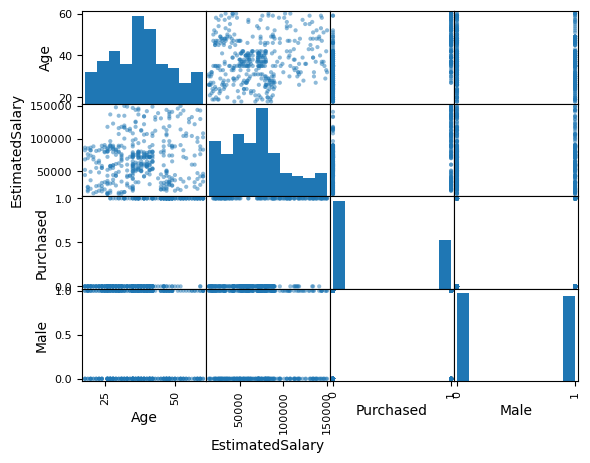

In [12]:
scatter_matrix(df)

<Axes: >

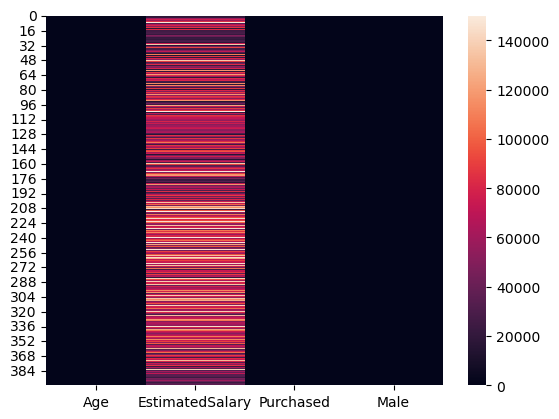

In [13]:
sns.heatmap(df)

<Axes: >

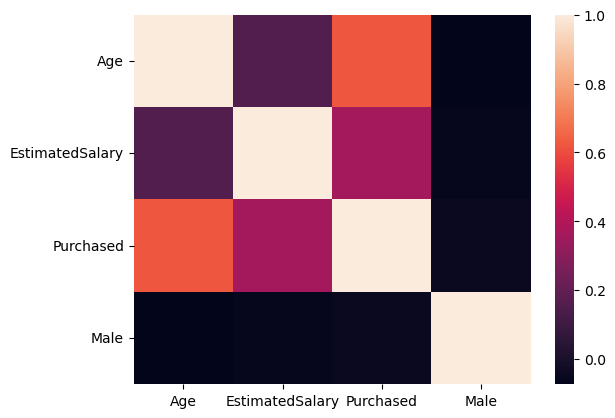

In [14]:
sns.heatmap(df.corr())

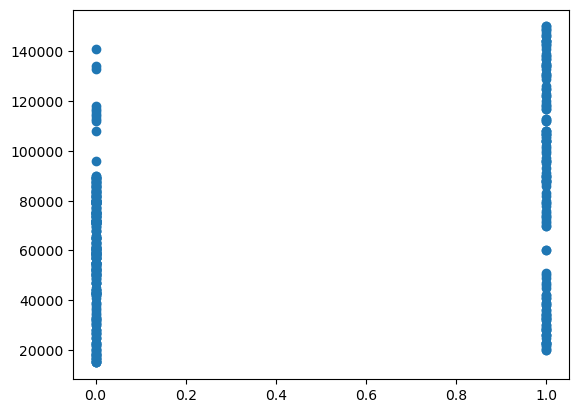

In [16]:
plt.scatter(x=df['Purchased'],y=df['EstimatedSalary'])

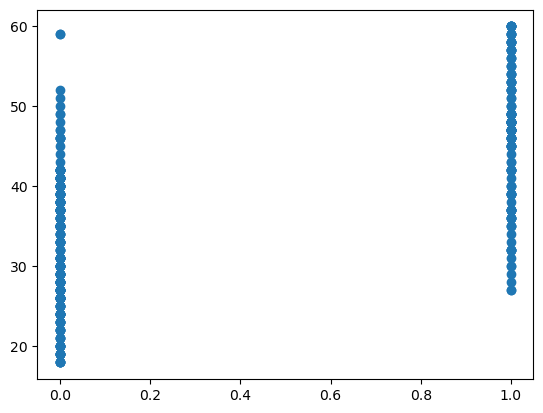

In [17]:
plt.scatter(x=df['Purchased'],y=df['Age'])

In [18]:
y=df['Purchased']
X=df.drop('Purchased',axis=1)

In [56]:
X_train

,Age,EstimatedSalary,Male
166,22,55000,0
296,42,73000,1
356,54,70000,1
232,40,107000,1
291,49,89000,1
...,...,...,...
294,35,57000,0
79,26,17000,0
317,35,55000,1
72,20,23000,0


In [182]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [183]:
X_test

,Age,EstimatedSalary,Male
251,37,52000,1
146,27,96000,0
4,19,76000,1
205,47,47000,0
107,27,89000,1
...,...,...,...
173,34,43000,0
260,35,77000,0
143,30,89000,1
171,34,115000,1


In [184]:
from sklearn.preprocessing import StandardScaler
stdscaler=StandardScaler()

In [185]:
X_train_scaled=stdscaler.fit_transform(X_train)
X_test_scaled=stdscaler.fit_transform(X_test)

In [188]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [189]:
 model.fit(X_train_scaled,y_train)

GaussianNB()

In [190]:
prediction=model.predict(X_test_scaled)

In [191]:
prediction

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [192]:
y_test

251    0
146    1
4      0
205    0
107    0
      ..
173    0
260    0
143    0
171    0
80     0
Name: Purchased, Length: 80, dtype: int64

In [193]:
model.score(X_test_scaled,y_test)

0.9

In [194]:
from sklearn.metrics import f1_score

In [195]:
f1_score(y_test,prediction)

0.8461538461538461